In [1]:
import numpy as np
import pandas as pd

In [2]:
column_names = [
    'frame', 'track_id', 'type', 'truncated', 'occluded', 'alpha', 'bbox_left', 'bbox_top',
    'bbox_right', 'bbox_bottom', 'height', 'width', 'length', 'pos_x', 'pos_y', 'pos_z', 'rot_y'
]

df = pd.read_csv('/home/aiseed/koko/catkin_ws/src/kitti_dataset_visualization/dataset/tracking/0000.txt', header=None, sep=' ')
df.columns = column_names
df.head()

,frame,track_id,type,truncated,occluded,alpha,bbox_left,bbox_top,bbox_right,bbox_bottom,height,width,length,pos_x,pos_y,pos_z,rot_y
0,0,-1,DontCare,-1,-1,-10.000000,219.310000,188.490000,245.500000,218.560000,-1000.000000,-1000.000000,-1000.000000,-10.000000,-1.000000,-1.000000,-1.000000
1,0,-1,DontCare,-1,-1,-10.000000,47.560000,195.280000,115.480000,221.480000,-1000.000000,-1000.000000,-1000.000000,-10.000000,-1.000000,-1.000000,-1.000000
2,0,0,Van,0,0,-1.793451,296.744956,161.752147,455.226042,292.372804,2.000000,1.823255,4.433886,-4.552284,1.858523,13.410495,-2.115488
3,0,1,Cyclist,0,0,-1.936993,737.619499,161.531951,931.112229,374.000000,1.739063,0.824591,1.785241,1.640400,1.675660,5.776261,-1.675458
4,0,2,Pedestrian,0,0,-2.523309,1106.137292,166.576807,1204.470628,323.876144,1.714062,0.767881,0.972283,6.301919,1.652419,8.455685,-1.900245


In [3]:
df.loc[df.type.isin(['Truck', 'Van', 'Tram']), 'type'] = 'Car'

## only need car, cyclist and pedestrain
df = df[df.type.isin(['Car', 'Cyclist', 'Pedestrian'])]
df.head()

,frame,track_id,type,truncated,occluded,alpha,bbox_left,bbox_top,bbox_right,bbox_bottom,height,width,length,pos_x,pos_y,pos_z,rot_y
2,0,0,Car,0,0,-1.793451,296.744956,161.752147,455.226042,292.372804,2.000000,1.823255,4.433886,-4.552284,1.858523,13.410495,-2.115488
3,0,1,Cyclist,0,0,-1.936993,737.619499,161.531951,931.112229,374.000000,1.739063,0.824591,1.785241,1.640400,1.675660,5.776261,-1.675458
4,0,2,Pedestrian,0,0,-2.523309,1106.137292,166.576807,1204.470628,323.876144,1.714062,0.767881,0.972283,6.301919,1.652419,8.455685,-1.900245
7,1,0,Car,0,0,-1.796862,294.898777,156.024256,452.199718,284.621269,2.000000,1.823255,4.433886,-4.650955,1.766774,13.581085,-2.121565
8,1,1,Cyclist,0,0,-1.935205,745.017137,156.393157,938.839722,374.000000,1.739063,0.824591,1.785241,1.700640,1.640419,5.778596,-1.664456


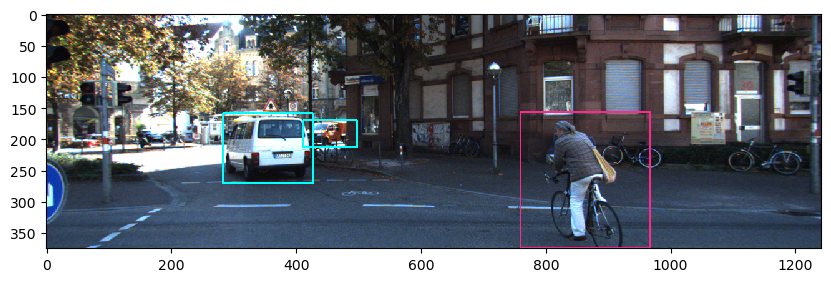

In [4]:
## extracted the four coordinate of boundary box
import cv2
import matplotlib.pyplot as plt

frame = 10

image = cv2.imread('/home/aiseed/koko/catkin_ws/src/kitti_dataset_visualization/dataset/2011_09_26/2011_09_26_drive_0005_sync/image_02/data/%010d.png'%frame)

boxes = np.array(df[df['frame']==frame][['type', 'bbox_left', 'bbox_top', 'bbox_right', 'bbox_bottom']])
detection_color_dict = {
    'Car':        (255, 255,   0),
    'Cyclist':    (141,  40, 255),
    'Pedestrian': (  0, 255, 255)
}

for box in boxes:
    tl = int(box[1]), int(box[2])
    br = int(box[3]), int(box[4])
    cv2.rectangle(image, tl, br, detection_color_dict[box[0]], 2)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 5))
plt.imshow(image)
plt.show()

## Plotting 3D Bounding Box

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

import sys, os
sys.path.append('../scripts/')

from collectors import *

In [6]:
def draw_point_cloud(ax, points, axes=[0, 1, 2], point_size=0.1, xlim3d=None, ylim3d=None, zlim3d=None):
    """
    Convenient method for drawing various point cloud projections as a part of frame statistics.
    """
    axes_limits = [
        [-20, 80], # X axis range
        [-20, 20], # Y axis range
        [ -3, 10]  # Z axis range
    ]
    axes_str = ['X', 'Y', 'Z']
    ax.grid(False)
    
    ax.scatter(*np.transpose(points[:, axes]), s=point_size, c=points[:, 3], cmap='gray')
    ax.set_xlabel('{} axis'.format(axes_str[axes[0]]))
    ax.set_ylabel('{} axis'.format(axes_str[axes[1]]))
    if len(axes) > 2:
        ax.set_xlim3d(*axes_limits[axes[0]])
        ax.set_ylim3d(*axes_limits[axes[1]])
        ax.set_zlim3d(*axes_limits[axes[2]])
        ax.set_zlabel('{} axis'.format(axes_str[axes[2]]))
    else:
        ax.set_xlim(*axes_limits[axes[0]])
        ax.set_ylim(*axes_limits[axes[1]])
        
    # User specified limits
    if xlim3d!=None:
        ax.set_xlim3d(xlim3d)
    if ylim3d!=None:
        ax.set_ylim3d(ylim3d)
    if zlim3d!=None:
        ax.set_zlim3d(zlim3d)

In [7]:
DATA_PATH = ('/home/aiseed/koko/catkin_ws/src/kitti_dataset_visualization'
             '/dataset/2011_09_26/2011_09_26_drive_0005_sync/')
frame = 0
pcl = read_pcl(os.path.join(DATA_PATH, f'velodyne_points/data/{frame:010d}.bin'))

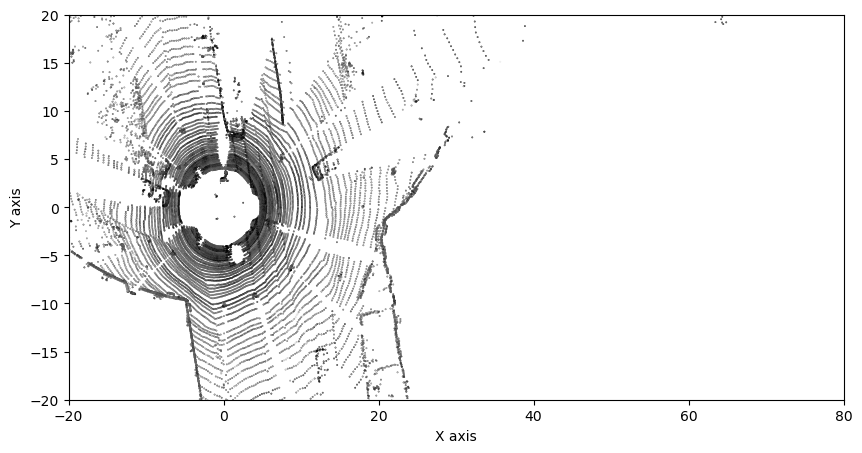

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
draw_point_cloud(ax, pcl[::5], axes=[0, 1])

In [9]:
df_tracking = read_tracking('/home/aiseed/koko/catkin_ws/src/kitti_dataset_visualization/dataset/tracking/0000.txt')
df_tracking.head()

,frame,track_id,type,truncated,occluded,alpha,bbox_left,bbox_top,bbox_right,bbox_bottom,height,width,length,pos_x,pos_y,pos_z,rot_y
2,0,0,Car,0,0,-1.793451,296.744956,161.752147,455.226042,292.372804,2.000000,1.823255,4.433886,-4.552284,1.858523,13.410495,-2.115488
3,0,1,Cyclist,0,0,-1.936993,737.619499,161.531951,931.112229,374.000000,1.739063,0.824591,1.785241,1.640400,1.675660,5.776261,-1.675458
4,0,2,Pedestrian,0,0,-2.523309,1106.137292,166.576807,1204.470628,323.876144,1.714062,0.767881,0.972283,6.301919,1.652419,8.455685,-1.900245
7,1,0,Car,0,0,-1.796862,294.898777,156.024256,452.199718,284.621269,2.000000,1.823255,4.433886,-4.650955,1.766774,13.581085,-2.121565
8,1,1,Cyclist,0,0,-1.935205,745.017137,156.393157,938.839722,374.000000,1.739063,0.824591,1.785241,1.700640,1.640419,5.778596,-1.664456


In [10]:
def draw_box(pyplot_axis, vertices, axes=[0, 1, 2], color='black') -> None:
    """
    Draws a bounding 3D box in a pyplot axis.
    @param pyplot_axis: Pyplot axis to draw in.
    @param vertices: Array 8 box vertices containing x, y, z coordinates.
    @param axes: Axes to use. Defaults to `[0, 1, 2]`, e.g. x, y and z axes.
    @param color: Drawing color. Defaults to `black`.
    """
    vertices = vertices[axes, :]
    connections = [
        [0, 1], [1, 2], [2, 3], [3, 0],  # Lower plane parallel to Z=0 plane
        [4, 5], [5, 6], [6, 7], [7, 4],  # Upper plane parallel to Z=0 plane
        [0, 4], [1, 5], [2, 6], [3, 7]   # Connections between upper and lower planes
    ]
    for connection in connections:
        pyplot_axis.plot(*vertices[:, connection], c=color, lw=0.5)

In [11]:
def compute_3d_box_cam2(h, w, l, x, y, z, yaw) -> np.ndarray:
    """
    @return: 3xn in cam2 coordinate
    """
    R = np.array([[np.cos(yaw), 0, np.sin(yaw)], [0, 1, 0], [-np.sin(yaw), 0, np.cos(yaw)]]) # rotation matrix
    x_corners = [l/2,l/2,-l/2,-l/2,l/2,l/2,-l/2,-l/2]
    y_corners = [0,0,0,0,-h,-h,-h,-h]
    z_corners = [w/2,-w/2,-w/2,w/2,w/2,-w/2,-w/2,w/2]
    corners_3d_cam2 = np.dot(R, np.vstack([x_corners,y_corners,z_corners]))
    corners_3d_cam2 += np.vstack([x, y, z])
    return corners_3d_cam2

In [12]:
from kitti_utils import *

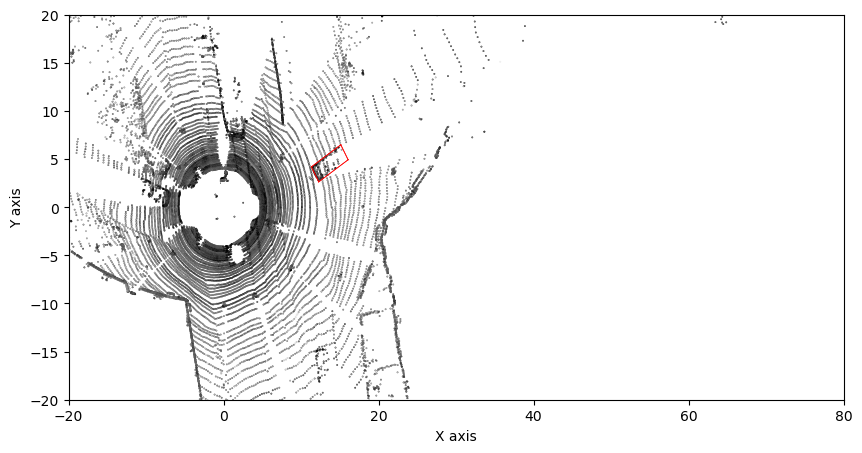

In [13]:
calib = Calibration('/home/aiseed/koko/catkin_ws/src/kitti_dataset_visualization/dataset/2011_09_26/', from_video=True) 

# 3d bbox in camera 2 coordinate -> velodi coordinate
corners_3d_cam2 = compute_3d_box_cam2(*df_tracking.loc[2,['height', 'width', 'length', 'pos_x', 'pos_y', 'pos_z', 'rot_y']])
corners_3d_velo = calib.project_rect_to_velo(corners_3d_cam2.T).T

## draw box
fig, ax = plt.subplots(figsize=(10, 5))
draw_point_cloud(ax, pcl[::5], axes=[0,1])
draw_box(ax, corners_3d_velo, axes=[0,1], color = 'r')

## IMU/GPS calculate the previous coordinates

In [14]:
import numpy as np
import pandas as pd

import sys, os
sys.path.append('../scripts/')

In [15]:
from collectors import *

DATA_PATH = (
    '/home/aiseed/koko/catkin_ws/src/kitti_dataset_visualization'
    '/dataset/2011_09_26/2011_09_26_drive_0005_sync/')
read_imu(os.path.join(DATA_PATH, f'oxts/data/0000000000.txt')) 

,lat,lon,alt,roll,pitch,yaw,vn,ve,vf,vl,...,wf,wl,wu,posacc,velacc,navstat,numsats,posmode,velmode,orimode
0,49.011213,8.422885,112.834923,0.022447,0.00001,-1.22191,-3.325632,1.138431,3.514768,0.037625,...,-0.017499,0.021393,0.14563,0.492294,0.068884,4,10,4,4,0


In [16]:
def compute_great_circle_distance(lat1, lon1, lat2, lon2):
    """
    @param lat1:
    @param lon1:
    @param lat2:
    @param lon2:
    """
    delta_sigma = float(np.sin(lat1 * np.pi / 180) * np.sin(lat2 * np.pi / 180) + \
                        np.cos(lat1 * np.pi / 180) * np.cos(lat2 * np.pi / 180) * np.cos(lon1 *np.pi / 180 - lon2 * np.pi / 180))
    return np.arccos(np.clip(delta_sigma, -1, 1)) * 6317000.0

In [17]:
previous_imu = None
gps_distances: list = []
imu_distances: list = []
for frame in range(150):
    imu_data = read_imu(os.path.join(DATA_PATH, f'oxts/data/%010d.txt'%frame))
    if previous_imu is not None:
        gps_distance = compute_great_circle_distance(imu_data.lat, imu_data.lon, previous_imu.lat, previous_imu.lon)
        gps_distances.append(gps_distance)

        imu_distances.append(np.linalg.norm(imu_data[['vf', 'vl']]) * 0.1)

    previous_imu = imu_data

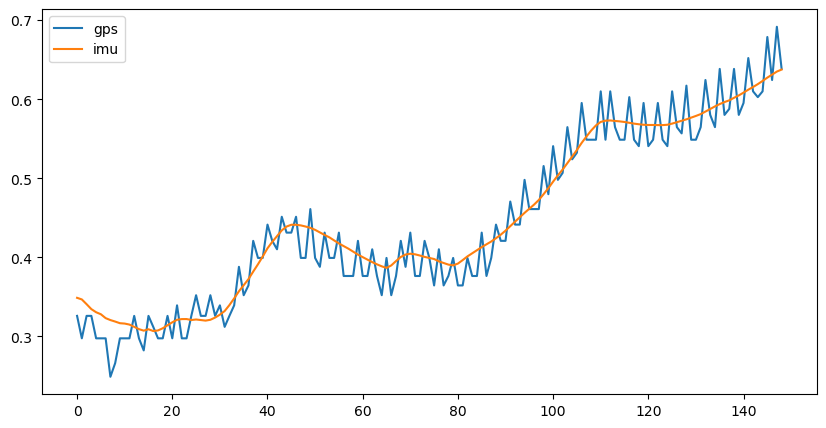

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(gps_distances, label='gps')
plt.plot(imu_distances, label='imu')
plt.legend()
plt.show()

In [19]:
previous_data = None
locations: list = []

for frame in range(150):
    imu_data = read_imu(os.path.join(DATA_PATH, f'oxts/data/%010d.txt'%frame))
    if previous_data is not None:
        displacement = np.linalg.norm(imu_data[['vf', 'vl']]) * 0.1
        yaw_change   = float(imu_data.yaw - previous_data.yaw)

        # change the coordinates in locations
        for idx in range(len(locations)):
            x0, y0 = locations[idx] # legacy coordinates
            x1 =  x0 * np.cos(yaw_change) + y0 * np.sin(yaw_change) - displacement
            y1 = -x0 * np.sin(yaw_change) + y0 * np.cos(yaw_change)
            locations[idx] = np.array([x1, y1])

    locations.append(np.array([0, 0]))
    previous_data = imu_data

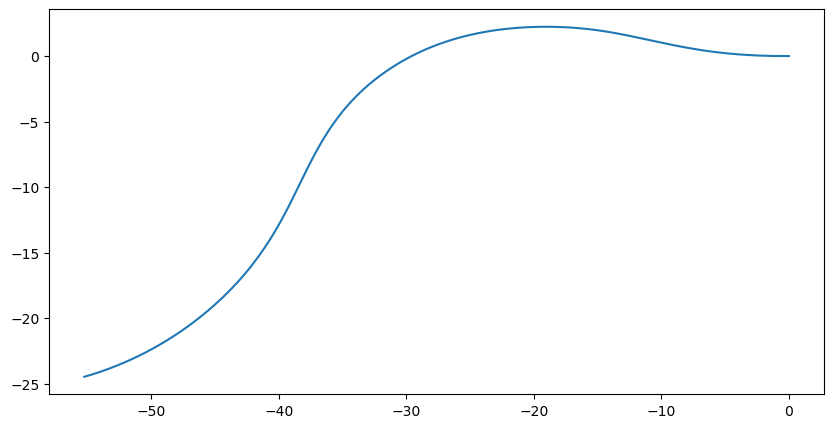

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(np.array(locations)[:, 0], np.array(locations)[:, 1])
plt.show()

## Distance to other objects

compact
1. bounded
2. closed

exist two point between 2 object -> minimum not only infimum

### 1. The point must on boundary
the point must on the boundary
if point not on boundary, then
$B(s,\epsilon)\in R_1$, but is must have a point on $B$ intersect with the line between $R_1$ and $R_2$


### 2. One of point must on the vertex
...

find the shortest distance between a line and a point

condition 1: the p is in ab
$d(\bar{AB}, P)=||PQ||$ that $Q$ is the point perpenticular to $\bar{AB}$


condition 2: p out of ab -> pa or pb is shortest -> $min(d(PA), d(PB))$


check $\Delta ABC$ is smaller or greater than 90 degree to check the p is in ab or out off ab <br>
we can simply use dot product result to verify.


$\angle{PAB} < 90^{\degree} == \vec{AP} \cdot \vec{AB} > 0$ <br>
$\angle{PAB} > 90^{\degree} == \vec{AP} \cdot \vec{AB} < 0$

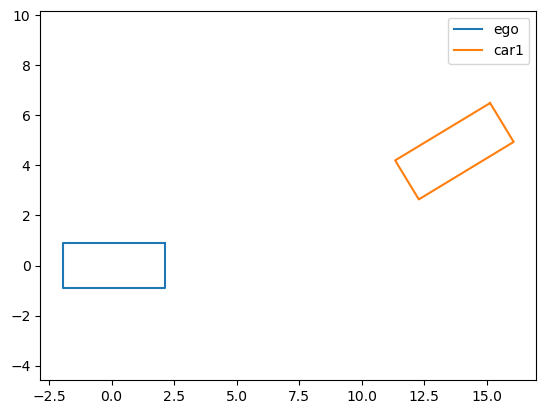

In [55]:
import numpy as np
import matplotlib.pyplot as plt

ego_car = np.array([[2.15, 0.9, -1.73], [2.15, -0.9, -1.73], [-1.95, -0.9, -1.73], [-1.95, 0.9, -1.73], 
                    [2.15, 0.9, -0.73], [2.15, -0.9, -0.23], [-1.95, -0.9, -0.23], [-1.95, 0.9, -0.23]])

plt.axes().set_aspect('equal', 'datalim')
plt.plot(ego_car[:5, 0], ego_car[:5, 1], label='ego')
plt.plot(corners_3d_velo.T[:5, 0], corners_3d_velo.T[:5, 1], label='car1') 
plt.legend()
plt.show()

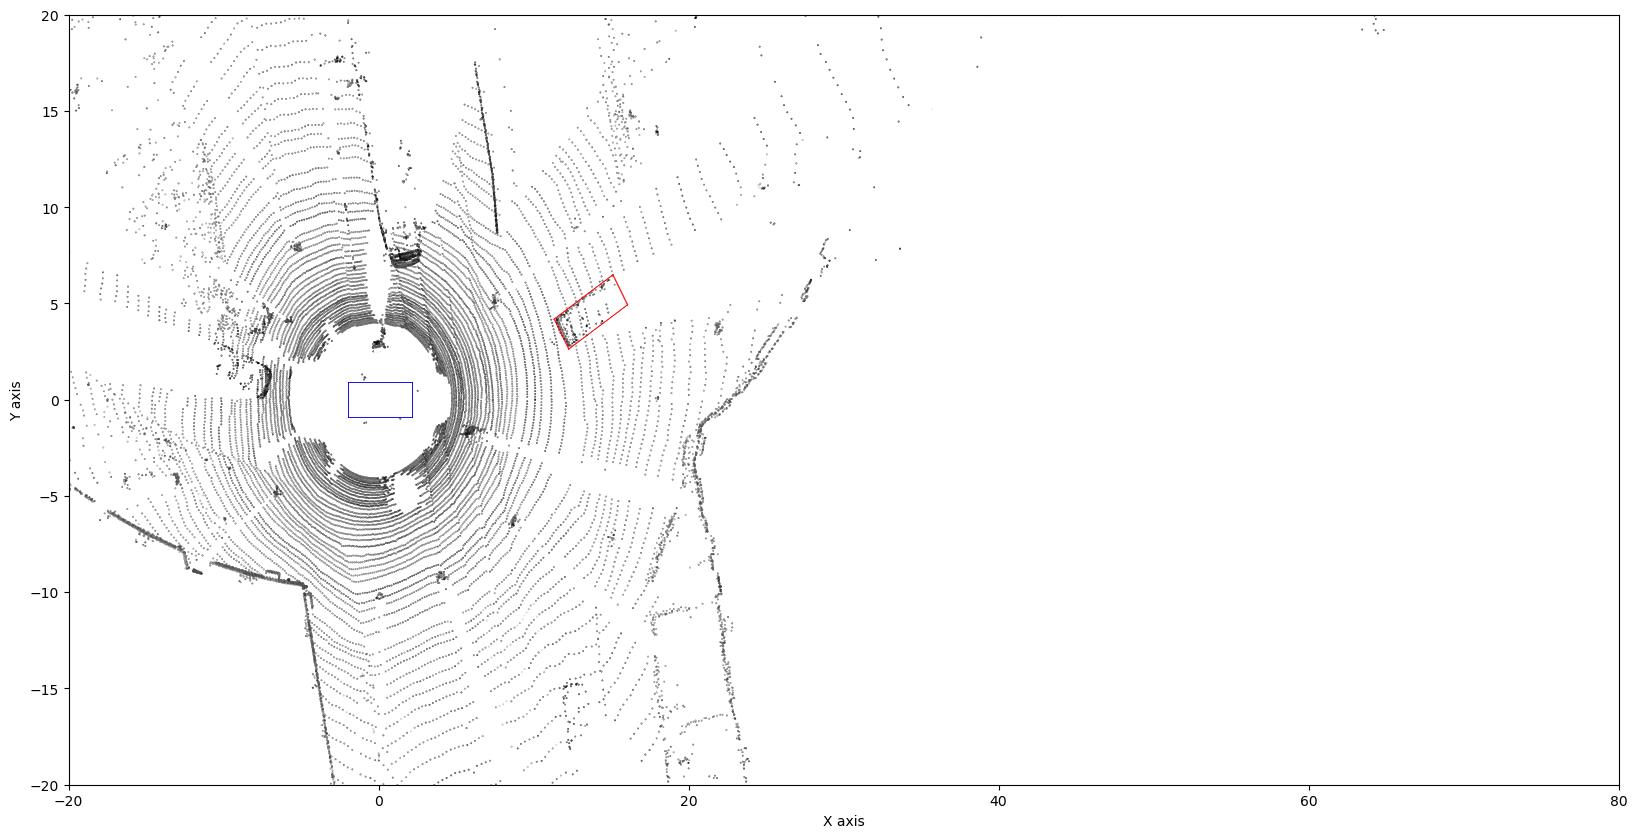

In [44]:
fig, ax = plt.subplots(figsize=(20, 10))
draw_point_cloud(ax, pcl[::5], axes=[0,1])
draw_box(ax, corners_3d_velo, axes=[0,1], color = 'r')
draw_box(ax, ego_car.T, axes=[0,1], color = 'b')

In [50]:
def distance_point_2_segment(p: np.ndarray, a: np.ndarray, b: np.ndarray) -> tuple:
    """
    calculate the min distance of a point p to segment ab
    """
    ap = p - a
    bp = p - b
    ab = b - a

    if np.dot(ab, ap) >= 0 and np.dot(-ab, bp) >= 0:
        return np.abs(np.cross(ap, bp)) / np.linalg.norm(ab), np.dot(ap, ab) / np.dot(ab, ab) * ab + a

    d_ap = np.linalg.norm(ap)
    d_bp = np.linalg.norm(bp)
    return (d_ap, a) if d_ap < d_bp else (d_bp, b)

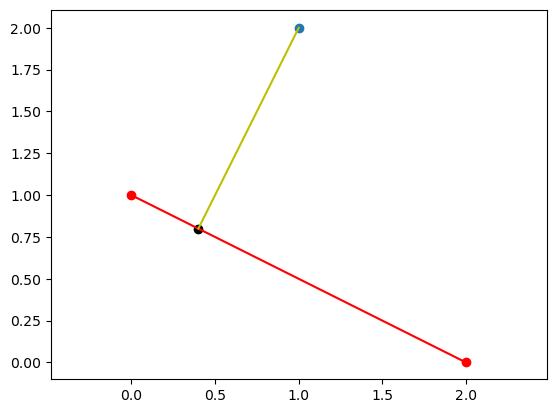

In [51]:
p = np.array([1, 2], dtype=np.float64)
a = np.array([0, 1], dtype=np.float64)
b = np.array([2, 0], dtype=np.float64)
d, Q = distance_point_2_segment(p, a, b)

plt.axes().set_aspect('equal', 'datalim')
plt.scatter(p[0], p[1])
plt.scatter(Q[0], Q[1], c='k')
plt.plot(list(zip(a, b))[0], list(zip(a, b))[1], 'r-o')
plt.plot(list(zip(p, Q))[0], list(zip(p, Q))[1], 'y-')
plt.show()

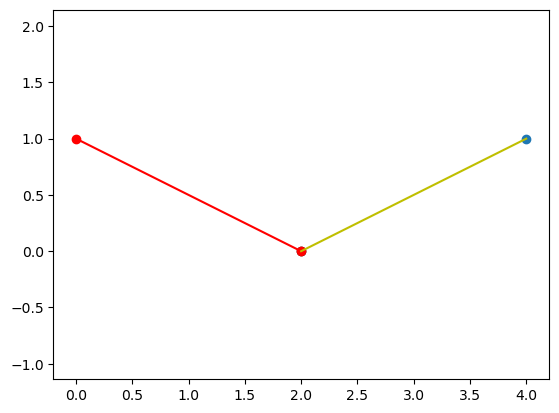

In [54]:
p = np.array([4, 1], dtype=np.float64)
a = np.array([0, 1], dtype=np.float64)
b = np.array([2, 0], dtype=np.float64)
d, Q = distance_point_2_segment(p, a, b)

plt.axes().set_aspect('equal', 'datalim')
plt.scatter(p[0], p[1])
plt.scatter(Q[0], Q[1], c='k')
plt.plot(list(zip(a, b))[0], list(zip(a, b))[1], 'r-o')
plt.plot(list(zip(p, Q))[0], list(zip(p, Q))[1], 'y-')
plt.show()

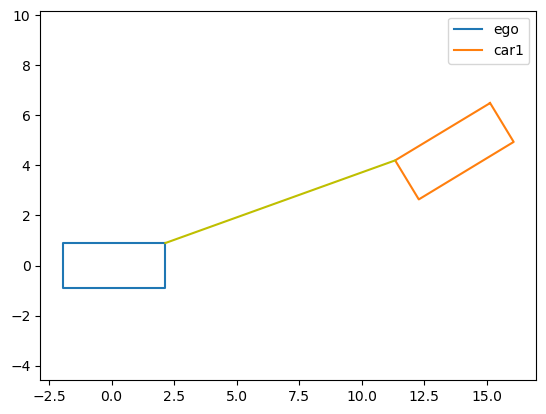

In [56]:
def min_distance_cuboids(cube1: np.ndarray, cube2: np.ndarray) -> tuple:
    min_d = 1e5
    for i in range(4):
        for j in range(4):
            d, Q = distance_point_2_segment(cube1[i, :2], cube2[j, :2], cube2[j+1, :2])
            if d < min_d:
                min_d = d
                min_p = cube1[i, :2]
                min_q = Q
    for i in range(4):
        for j in range(4):
            d, Q = distance_point_2_segment(cube2[i, :2], cube1[j, :2], cube1[j+1, :2])
            if d < min_d:
                min_d = d
                min_p = cube2[i, :2]
                min_q = Q
    return min_p, min_q, min_d

plt.axes().set_aspect('equal', 'datalim')
plt.plot(ego_car[:5, 0], ego_car[:5, 1], label='ego')
plt.plot(corners_3d_velo.T[:5, 0], corners_3d_velo.T[:5, 1], label='car1') 
min_p, min_q, min_d = min_distance_cuboids(ego_car, corners_3d_velo.T)
plt.plot(list(zip(min_p, min_q))[0], list(zip(min_p, min_q))[1], 'y-')
plt.legend()
plt.show()

In [59]:
print(f'min distance: {min_d:.04} m')

min distance: 9.758 m
